# SENTIMENT ANALYSIS ON DIGITAL BANKING

### AIM: To identify and extract opinions on digital banking.

### Methodology : 
### 1) Clean and Preprocess text data  using regular expressions and NLTK
### 2) Visualization using word cloud
### 3)  Performing sentiment analysis using SentimentIntensityAnalyzer model

### Conclusion : Based on the visualized data, digital banking is a well accepted concept. With this analysis it could be predicted that digital banking may improve further more over the  coming years.

In [2]:
# Libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
import string
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA # Using SentimentIntensityAnalyzer for analyzing the sentiments in the text data.
#from textblob import TextBlob

C:\Users\Kenechi\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


# Load data

In [3]:
db= pd.read_csv('DB.txt', sep = '.', names = ["Reviews", "Nan"])

In [4]:
# Displaying the first five rows in the column.
db.head()

,Reviews,Nan
0,The Financial Technology (Fintech) industry in...,
1,This was disclosed in the 2019 African Tech St...,NaN
2,"The report stated that African tech startups, ...",NaN
3,The number of investors in African tech startu...,NaN
4,"Financial Technology FinTech, Job loss, Accion...",NaN


In [5]:
# Length of text data.
db.Reviews.value_counts().sum()

40

In [6]:
# Dropping the Nan column
db.drop(['Nan'], axis = 1, inplace = True)

# Cleaning the data

In [7]:
# Removing all the numbers in the text, because they are not useful
no_numbers = []
for i in db['Reviews']:
    hold = re.sub('\w*\d\w*', '', i)
    no_numbers.append(hold)
db['no_numbers'] = no_numbers
db.head() # displays the first five lines.

,Reviews,no_numbers
0,The Financial Technology (Fintech) industry in...,The Financial Technology (Fintech) industry in...
1,This was disclosed in the 2019 African Tech St...,This was disclosed in the African Tech Startu...
2,"The report stated that African tech startups, ...","The report stated that African tech startups, ..."
3,The number of investors in African tech startu...,The number of investors in African tech startu...
4,"Financial Technology FinTech, Job loss, Accion...","Financial Technology FinTech, Job loss, Accion..."


In [8]:
# Converting the reviews to lower cases, because the data is case sensitive
lower_case =[]
for i in db['no_numbers']:
    hold = i.lower()
    lower_case.append(hold)

db['lower_case'] = lower_case
db.head()

,Reviews,no_numbers,lower_case
0,The Financial Technology (Fintech) industry in...,The Financial Technology (Fintech) industry in...,the financial technology (fintech) industry in...
1,This was disclosed in the 2019 African Tech St...,This was disclosed in the African Tech Startu...,this was disclosed in the african tech startu...
2,"The report stated that African tech startups, ...","The report stated that African tech startups, ...","the report stated that african tech startups, ..."
3,The number of investors in African tech startu...,The number of investors in African tech startu...,the number of investors in african tech startu...
4,"Financial Technology FinTech, Job loss, Accion...","Financial Technology FinTech, Job loss, Accion...","financial technology fintech, job loss, accion..."


In [9]:
# Removing Punctuations, they add no relevance

Final_form = []
for i in db['lower_case'] :
    hold = re.sub('[%s]'%re.escape(string.punctuation), ' ',str(i))
    Final_form.append(hold)
    
db['Final_form'] = Final_form
db.head()

,Reviews,no_numbers,lower_case,Final_form
0,The Financial Technology (Fintech) industry in...,The Financial Technology (Fintech) industry in...,the financial technology (fintech) industry in...,the financial technology fintech industry in...
1,This was disclosed in the 2019 African Tech St...,This was disclosed in the African Tech Startu...,this was disclosed in the african tech startu...,this was disclosed in the african tech startu...
2,"The report stated that African tech startups, ...","The report stated that African tech startups, ...","the report stated that african tech startups, ...",the report stated that african tech startups ...
3,The number of investors in African tech startu...,The number of investors in African tech startu...,the number of investors in african tech startu...,the number of investors in african tech startu...
4,"Financial Technology FinTech, Job loss, Accion...","Financial Technology FinTech, Job loss, Accion...","financial technology fintech, job loss, accion...",financial technology fintech job loss accion...


In [10]:
#Dropping the rest and using only Final_form
db.drop(['Reviews'], axis = 1, inplace = True)
db.drop(['no_numbers'], axis = 1, inplace = True)
db.drop(['lower_case'], axis = 1, inplace = True)
db.head()

,Final_form
0,the financial technology fintech industry in...
1,this was disclosed in the african tech startu...
2,the report stated that african tech startups ...
3,the number of investors in african tech startu...
4,financial technology fintech job loss accion...


In [11]:
tokenizer = RegexpTokenizer(r'\w+') # seperates every sentence into individual words


In [12]:
# Removes Stopwords(removing words that have little or no meaning in the text data that occur frequently. examples: is,and,the,a, so on.)
stopwords = stopwords.words('english')
Db = list(db.Final_form)
token = []
for words in Db:
    toks = tokenizer.tokenize(words)
    toks= [t.lower() for t in toks if t.lower() not in stopwords]
    token.extend(toks) # adds the content of a list into another list

In [13]:
# Shows you the top 5 frequent the words and how much they occur.
word_frequency = nltk.FreqDist(token)
word_frequency.most_common(5)

[('africa', 9),
 ('financial', 8),
 ('fintech', 8),
 ('million', 8),
 ('nigeria', 7)]

# Word Cloud

### word cloud is used in depicting key words in a corpus of text. It also gives a wonderful visualization of the text data,the more frequent a word is used in the text, the bigger in size it appears.we could also use word cloud to know the kind of words being used around or associated with  the word 'Digital banking'.

In [14]:
# creating a fucntion to implement word cloud.
def wordcloud(words,title):
    cloud = WordCloud(width=1920, height=1080,max_font_size=200, max_words=300, background_color="black").generate(words)
    plt.figure(figsize=(20,20))
    plt.imshow(cloud, interpolation="gaussian")
    plt.axis("off") 
    plt.title(title, fontsize=60)
    plt.show()

In [15]:
# Putting the reviews in string format.
str_ = ''
for i in Db:
    str_ += i

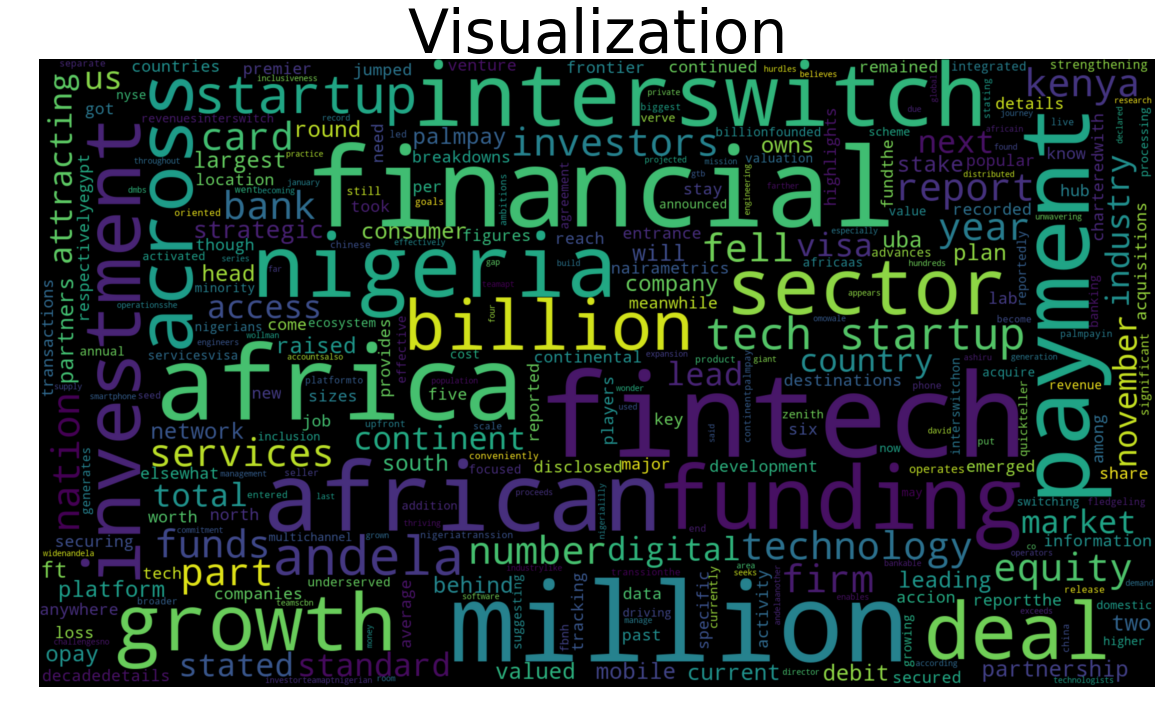

In [16]:
# Using the function created
wordcloud(str_, "Visualization")

# From what we can deduce from the data, it seems digital banking is somewhat associated a lot with fintech start-ups . 

# Sentiment Analysis

In [25]:
sia = SIA()
review = []

for line in Db:
    polarity_score = sia.polarity_scores(line) # checking how positive, negative and neurtral a sentence is.
    polarity_score['review'] = line # the sentence itself
    review.append(polarity_score)  # appending the score for every sentence and the sentence respectively to the review list. 
    
review # displaying our scores.

[{'neg': 0.0,
  'neu': 0.876,
  'pos': 0.124,
  'compound': 0.4767,
  'review': 'the financial technology  fintech  industry in nigeria has come to stay  as it took the lead in africa attracting   million in funds in '},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'review': 'this was disclosed in the  african tech startups funding report'},
 {'neg': 0.0,
  'neu': 0.805,
  'pos': 0.195,
  'compound': 0.5574,
  'review': 'the report stated that african tech startups  with  companies secured   million worth of investment in  and nigeria got   of that fund'},
 {'neg': 0.0,
  'neu': 0.806,
  'pos': 0.194,
  'compound': 0.1027,
  'review': 'the number of investors in african tech startups jumped by   to reach '},
 {'neg': 0.128,
  'neu': 0.726,
  'pos': 0.145,
  'compound': 0.0772,
  'review': 'financial technology fintech  job loss  accion venture lab  fintech  growth frontier of the next decade'},
 {'neg': 0.0,
  'neu': 0.82,
  'pos': 0.18,
  'compound': 0.6705,
  'revie

In [26]:
# Transferring to a new data drame
folder3 = pd.DataFrame.from_records(review)
folder3.head()

,compound,neg,neu,pos,review
0,0.4767,0.000,0.876,0.124,the financial technology fintech industry in...
1,0.0000,0.000,1.000,0.000,this was disclosed in the african tech startu...
2,0.5574,0.000,0.805,0.195,the report stated that african tech startups ...
3,0.1027,0.000,0.806,0.194,the number of investors in african tech startu...
4,0.0772,0.128,0.726,0.145,financial technology fintech job loss accion...


# Since the compound value gives a single value sentiment score, we would create a threshold such that  if the compound score is greater than 0.1 it is positive, if less than -0.1 it is negative.

In [27]:

folder3['grade'] = 0
folder3.loc[folder3['compound'] > 0.1, 'grade'] = 1
folder3.loc[folder3['compound'] < -0.1, 'grade'] = -1
folder3.head()

,compound,neg,neu,pos,review,grade
0,0.4767,0.000,0.876,0.124,the financial technology fintech industry in...,1
1,0.0000,0.000,1.000,0.000,this was disclosed in the african tech startu...,0
2,0.5574,0.000,0.805,0.195,the report stated that african tech startups ...,1
3,0.1027,0.000,0.806,0.194,the number of investors in african tech startu...,1
4,0.0772,0.128,0.726,0.145,financial technology fintech job loss accion...,0


In [28]:
# we would be dropping the compound, negative, neutral, and positive  columns.
folder3.drop(['compound'], axis = 1, inplace = True)
folder3.drop(['neg'], axis = 1, inplace = True)
folder3.drop(['neu'], axis = 1, inplace = True)
folder3.drop(['pos'], axis = 1, inplace = True)

In [29]:
# we wont be focusing on neutral words which is indicated by a grade value of 0
new_folder3 = folder3[(folder3.grade == 1) | (folder3.grade == -1)]
new_folder3.head()

,review,grade
0,the financial technology fintech industry in...,1
2,the report stated that african tech startups ...,1
3,the number of investors in african tech startu...,1
5,details the report details how kenya and nige...,1
6,egypt continued its development into a major c...,1


# RESULTS:

In [30]:
print("Positive reviews:\n")
print(list(new_folder3[new_folder3['grade'] == 1].review)[:6])

Positive reviews:

['the financial technology  fintech  industry in nigeria has come to stay  as it took the lead in africa attracting   million in funds in ', 'the report stated that african tech startups  with  companies secured   million worth of investment in  and nigeria got   of that fund', 'the number of investors in african tech startups jumped by   to reach ', 'details  the report details how kenya and nigeria emerged as the premier investment destinations on the continent in   attracting us  million and us  million in funding respectively', 'egypt continued its development into a major continental tech hub  with more startups from the north african country securing investment than anywhere else', 'what you need to know about fintech  the sector remained the most popular among investors  though its share of total funding fell to ']


In [31]:
print("\nNegative reviews:\n")
print(list(new_folder3[new_folder3['grade'] ==-1].review)[:6])


Negative reviews:

['she said  “the global demand for software engineers far exceeds supply  and that gap is projected to widen', 'in all  while the firms are trying to keep their heads above water  emefiele explained that as part of the bank’s priorities for   it would also  sustain these efforts in  as part of its plan to reduce financial exclusion rate to under   over the next year']


In [32]:
# Get the number of negative thoughts and positive thoughts around loans
print(new_folder3.grade.value_counts())

 1    18
-1     2
Name: grade, dtype: int64


(array([0, 1]), <a list of 2 Text xticklabel objects>)

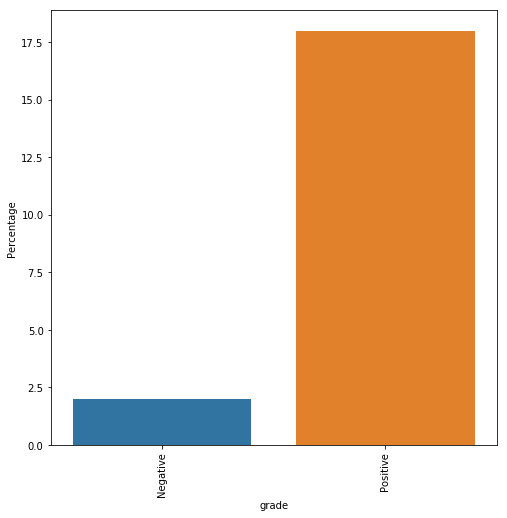

In [33]:
#Visualization
fig, ax = plt.subplots(figsize=(8, 8))
g = sns.countplot(new_folder3.grade * 100)
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel("Percentage")

plt.xticks(rotation = 90)

### Based on the visualized data, digital banking is a well accepted concept. With this analysis it could be predicted that digital banking may improve further more over the coming years.